# <b>CS156 (Introduction to AI), Spring 2022</b>
# <u><b>Final term project</b></u>

### Roster Name: Edward Phan 
### Student ID: 014080131
### Email address: edward.phan@sjsu.edu
Any special notes or anything you would like to communicate to me about this project submission goes in here.

##  <u> Project description/introduction text (the background information) </u>

The problem I am trying to solve is cryptocurrency value predictions. Cryptocurrency is one of the most volatile investments a person can take on. With that volitility comes the benefit of larger gains. The issue with the volitility is the larger loses. For example, there was recently a crash in bitcoin which led to the crash of the rest of the crypto market. These sort of crashes are scary to any holder and a predictive model can help identifying when this happens. Although the models today are not accurate enough to the point where they can soley be relied on as a trading strategy, they can still be used in tandem with your own knowledge and intuition to make educated crypto purhcases.

##  <u> Machine learning algorithm selected for this project </u>

The machine learning algorithm used for this project is the keras LSTM model. The LSTM model is a form of recurrent neural network(RNN). These types of neural networks use the information previoulsy learned to be able to generate more information and create their own predictions. According to multiple sources, the LSTM model is a common ml model used to predict stock prices. I will also be using linear regression to try to predict the price of the crypto and see which model is better.

##  <u> Dataset source </u>

https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory

##  <u> References and sources </u>

https://towardsdatascience.com/predicting-stock-prices-using-a-keras-lstm-model-4225457f0233

https://colah.github.io/posts/2015-08-Understanding-LSTMs/

https://www.kaggle.com/code/ravehgillmore/cryptocurrency-prediction

https://www.kaggle.com/code/duncanlester/cryptocurrency-historical-price-and-trade-volume


##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [11]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.metrics import MeanSquaredError

In [12]:
np.random.seed(42)

## Function to read in the data

In [13]:
RootDir = "./data"
def read_data ():
    names = []
    coin_num = 0
    
    # gets the max number of data points in case the dataset size increases
    max_length = 100000
    for name in os.listdir(RootDir):
        # keeps track of the amount of data for all cryptocoins
        df = pd.read_csv(RootDir + "/" + name, parse_dates=['Date'])
        length = df.shape[0]
        if max_length < length:
            max_length = length
        coin_num += 1

    
    data = np.zeros ((coin_num, max_length))
    lengths = np.zeros(coin_num, dtype = int)
    i = 0
    
    # Plots each coin and their values
    for name in os.listdir(RootDir):

        coin_name = name[5:-4]
        names.append(coin_name)
        df = pd.read_csv(RootDir + "/" + name, parse_dates=['Date'])
        
        # Saves the values of the length and closing values
        length = df.shape[0]
        lengths[i] = length
        data[i, 0:length] = df['Close'].values 
        
        # Plotting each coin
        X = df['Date'].values
        Y = df['Close'].values
    
        plt.title(coin_name)
        plt.plot(X,Y)
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.show()
        
        # increments iterator
        i += 1
    
    return coin_num, names, lengths, data, 

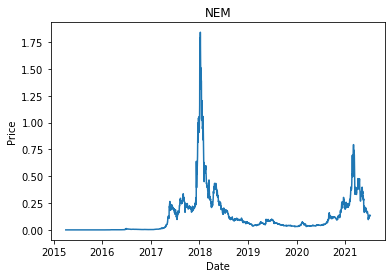

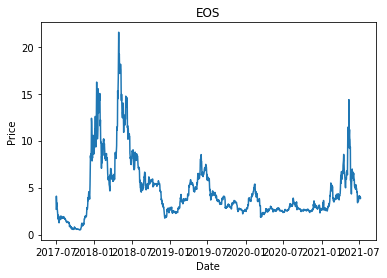

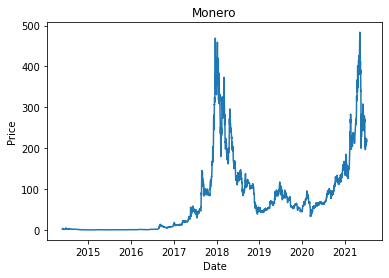

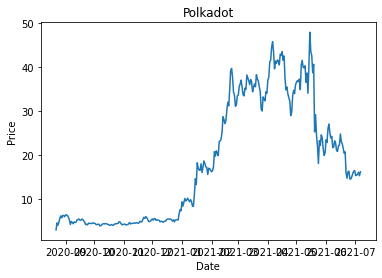

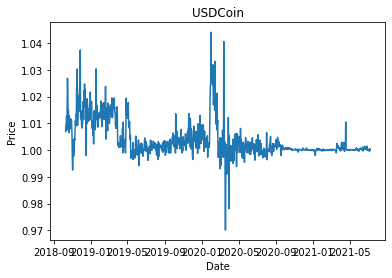

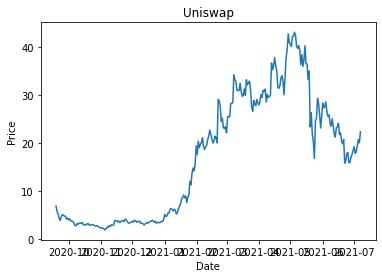

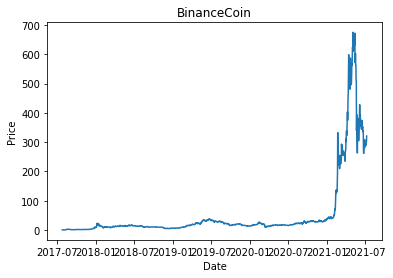

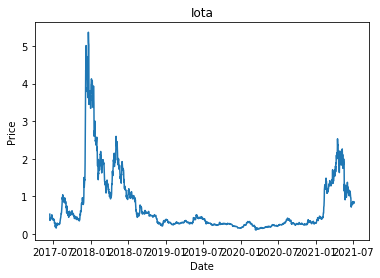

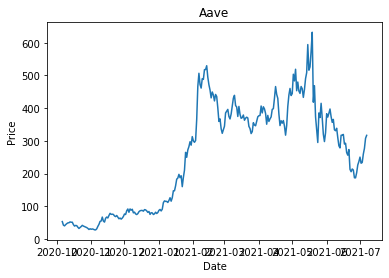

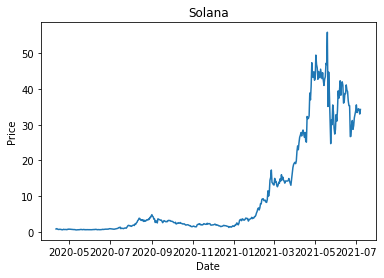

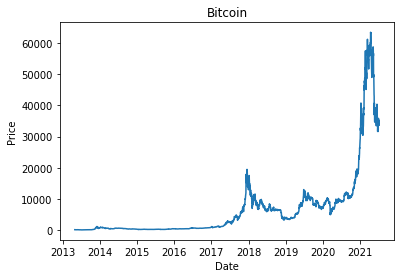

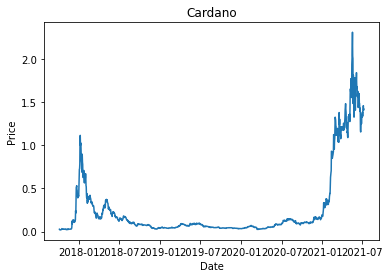

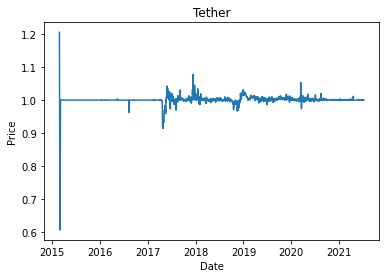

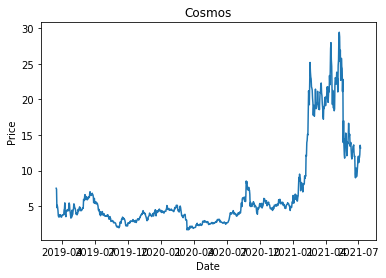

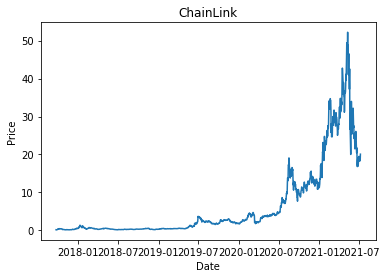

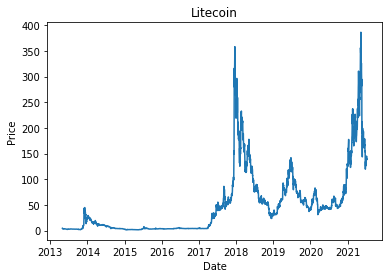

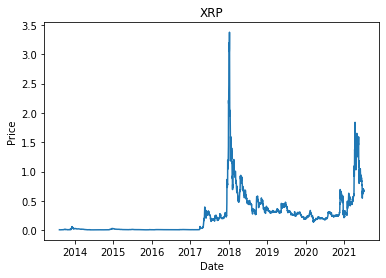

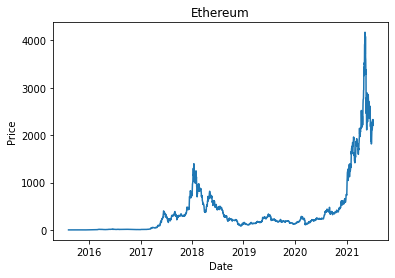

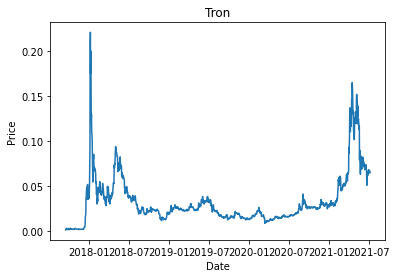

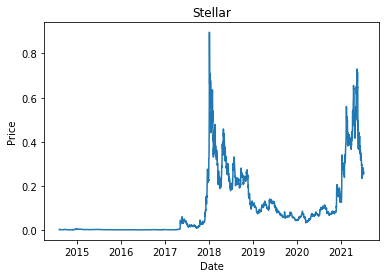

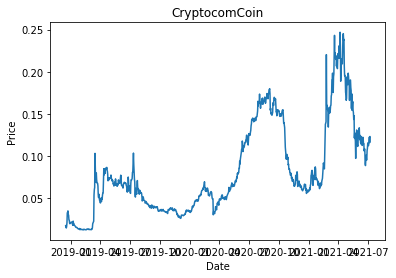

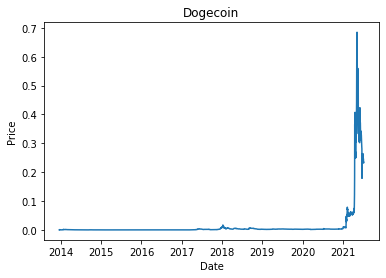

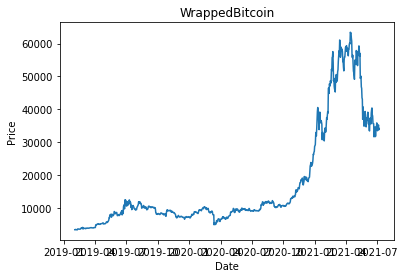

In [14]:
coin_num, names, lengths, data = read_data()

## Normalizing the data 

In [15]:
scaler = MinMaxScaler()
scaler.fit(data)
normalized = scaler.transform(data)

## Splitting the data into Test/Train/Validation sets

In [16]:
def split_data (data, lengths, start, end):
    k = 60
    x = []
    y = []
    for i in range (start, end):   
        for j in range(k, lengths[i]):
            x.append(data[i, j-k:j])
            y.append(data[i, j])
    return np.array(x)[:, :, np.newaxis], np.array(y)

In [17]:
# Using the first 18 coins as the trainning data
x_train, y_train = split_data(data, lengths, 0, 18)

# Using the next 4 coins as the validation data
x_val, y_val = split_data(data, lengths, 18, 22)

# Using the last coin as test data
x_test, y_test = split_data(data, lengths, 22, 23)

## Building the LSTM model

In [18]:
def build_lstm ():
    # Build an LSTM model
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape= (60, 1)))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanSquaredError()])
    model.summary()
    
    return model

model = build_lstm()

2022-05-16 17:55:53.535032: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [19]:
# hist = model.fit(x_train, y_train, validation_data = (x_val, y_val), 
#               batch_size=32, epochs=5) 

## Plotting prediction v actual values

In [20]:
predictions = model.predict(x_test)

plt.plot(predictions*factor[22] + shift[22])
plt.title('Prediction values')
plt.show()

plt.plot(y_test*factor[22] + shift[22])   
plt.title('Actual Values')
plt.show()


plt.plot(predictions*factor[22] + shift[22])
plt.plot(y_test*factor[22] + shift[22]) 
plt.title('Prediction v Actual Values')
plt.legend(["Predictions","Real data"])
plt.show()


NameError: name 'factor' is not defined

In [ ]:
error = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print('Root-mean-square error:', error)

## 2) Linear Regression model on WrappedBitcoin

In [ ]:
WrappedBitcoin = pd.read_csv("./data/coin_WrappedBitcoin.csv")

projection_WrappedBitcoin = 5
#creation of a new column with a name prediction
WrappedBitcoin['Prediction'] = WrappedBitcoin[['Close']].shift(-projection_WrappedBitcoin)
WrappedBitcoin.head()

In [ ]:
x_wb, y_wb = time, WrappedBitcoin['Close'].values


plt.plot(x_wb, y_wb)
plt.title('WrappedBitcoin')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
# x_train_wb, x_test_wb, y_train_wb, y_test_wb = train_test_split(x_wb,y_wb,test_size=0.2)

x_wb = np.array(WrappedBitcoin[['Close']])
x_wb = X_WrappedBitcoin[:-projection_WrappedBitcoin]

y_wb = WrappedBitcoin['Prediction'].values
y_wb = y_WrappedBitcoin[:-projection_WrappedBitcoin]


## Splitting the data into trainning sets

In [ ]:
x_train_wb, x_test_wb, y_train_wb, y_test_wb = train_test_split(x_wb,y_wb,test_size=0.2)

## Making the linear regression model

In [ ]:
model = LinearRegression()
model.fit(x_train_wb,y_train_wb)

## Print out confidence level

In [ ]:
linReg_confidence_WrappedBitcoin = linReg_WrappedBitcoin.score(x_test_wb,y_test_wb)
print("Confidence for WrappedBitcoin:",linReg_confidence_WrappedBitcoin)